In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('/kaggle/input/customer-behaviour-dataset/customer_segmentation_mixed.csv')


In [2]:
df.head()

,Age,Annual_Income,Spending_Score,Monthly_Visits,Gender,Preferred_Product
0,56,26102,85,6,Female,Clothing
1,46,70336,75,18,Male,Home
2,32,105314,36,10,Male,Groceries
3,60,46641,99,5,Female,Electronics
4,25,54584,19,10,Male,Electronics


In [3]:
df.shape

(350, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                350 non-null    int64 
 1   Annual_Income      350 non-null    int64 
 2   Spending_Score     350 non-null    int64 
 3   Monthly_Visits     350 non-null    int64 
 4   Gender             350 non-null    object
 5   Preferred_Product  350 non-null    object
dtypes: int64(4), object(2)
memory usage: 16.5+ KB


In [5]:
df.dtypes

Age                   int64
Annual_Income         int64
Spending_Score        int64
Monthly_Visits        int64
Gender               object
Preferred_Product    object
dtype: object

In [6]:
df.describe()

,Age,Annual_Income,Spending_Score,Monthly_Visits
count,350.000000,350.000000,350.000000,350.000000
mean,41.202857,71213.274286,49.571429,9.522857
std,13.422450,29311.239749,29.602801,5.584290
min,18.000000,20412.000000,1.000000,1.000000
25%,30.000000,45981.750000,24.000000,5.000000
50%,42.000000,71990.500000,51.000000,9.000000
75%,52.000000,97945.500000,75.000000,14.000000
max,64.000000,119835.000000,99.000000,19.000000


In [7]:
df['Spending_Score'].value_counts()

Spending_Score
75    8
26    8
5     7
56    7
17    7
     ..
80    1
7     1
2     1
48    1
9     1
Name: count, Length: 98, dtype: int64

In [8]:
df['Age'].unique()

array([56, 46, 32, 60, 25, 38, 36, 40, 28, 41, 53, 57, 20, 39, 19, 61, 47,
       55, 50, 29, 42, 44, 59, 45, 33, 64, 54, 24, 26, 35, 21, 31, 43, 37,
       52, 34, 23, 51, 27, 48, 62, 58, 18, 22, 30, 49, 63])

In [9]:
df['Age'].nunique()

47

In [10]:
## Missing Values
df.isnull().sum()

Age                  0
Annual_Income        0
Spending_Score       0
Monthly_Visits       0
Gender               0
Preferred_Product    0
dtype: int64

In [11]:
df['Spending_Score'].mode()

0    26
1    75
Name: Spending_Score, dtype: int64

In [12]:
df['Preferred_Product'].head()

0       Clothing
1           Home
2      Groceries
3    Electronics
4    Electronics
Name: Preferred_Product, dtype: object

In [13]:
df['Preferred_Product'].str.isnumeric().sum()

np.int64(0)

In [14]:
df[~df['Preferred_Product'].str.isnumeric()]

,Age,Annual_Income,Spending_Score,Monthly_Visits,Gender,Preferred_Product
0,56,26102,85,6,Female,Clothing
1,46,70336,75,18,Male,Home
2,32,105314,36,10,Male,Groceries
3,60,46641,99,5,Female,Electronics
4,25,54584,19,10,Male,Electronics
...,...,...,...,...,...,...
345,48,87641,37,12,Female,Home
346,52,56395,11,12,Male,Home
347,50,42700,77,19,Male,Clothing
348,38,54620,3,6,Female,Electronics


In [15]:
df_copy = df.copy()

In [16]:
df_copy.head()

,Age,Annual_Income,Spending_Score,Monthly_Visits,Gender,Preferred_Product
0,56,26102,85,6,Female,Clothing
1,46,70336,75,18,Male,Home
2,32,105314,36,10,Male,Groceries
3,60,46641,99,5,Female,Electronics
4,25,54584,19,10,Male,Electronics


In [17]:
df_copy.shape

(350, 6)

In [18]:
df_copy['Annual_Income'].head()

0     26102
1     70336
2    105314
3     46641
4     54584
Name: Annual_Income, dtype: int64

In [19]:
df_copy['Annual_Income'].unique()

array([ 26102,  70336, 105314,  46641,  54584,  52745,  43093,  86105,
        71885,  56631,  92991,  24014,  31093,  38070,  55777,  76958,
       102074,  30729, 119713,  65017,  86320,  47751,  98069,  74748,
        25801,  39190,  69689,  70993,  49592,  30647,  28716, 108891,
       107545, 109912,  90316,  22368,  97575,  26655,  90031,  96429,
       111083, 107922,  75766,  33403,  52097,  98657,  30966, 119157,
       113848,  72921,  69726,  70300,  42677,  75609, 116825,  76661,
        51024,  90313,  73006, 115285,  35338,  88027, 112772, 100135,
        39508,  23051,  68747, 107142, 107235,  74021,  86412,  78335,
        76179,  52093,  89678, 100738,  59734,  92615,  93523, 114476,
        37019, 103613, 111794, 106672,  93847, 102750,  99634,  48251,
        45945, 110852,  52217,  28308,  25949,  71990,  21150, 109480,
        94740,  86617, 114841,  36896,  66175,  27805,  25237,  40056,
        65543,  76556,  23343,  33500,  73222,  49375,  29662,  36964,
      

In [20]:
df_copy['Annual_Income'].nunique()

349

In [21]:
df_copy

,Age,Annual_Income,Spending_Score,Monthly_Visits,Gender,Preferred_Product
0,56,26102,85,6,Female,Clothing
1,46,70336,75,18,Male,Home
2,32,105314,36,10,Male,Groceries
3,60,46641,99,5,Female,Electronics
4,25,54584,19,10,Male,Electronics
...,...,...,...,...,...,...
345,48,87641,37,12,Female,Home
346,52,56395,11,12,Male,Home
347,50,42700,77,19,Male,Clothing
348,38,54620,3,6,Female,Electronics


In [22]:
df_copy["Age"].value_counts()

Age
50    15
52    14
41    13
61    12
45    11
19    11
56    11
49    11
25    10
54     9
20     9
28     8
24     8
32     8
46     8
43     8
18     8
42     8
58     8
26     8
53     7
57     7
38     7
59     7
23     7
31     7
39     7
21     7
33     7
44     7
47     7
37     7
34     6
36     6
40     6
35     6
62     6
64     6
55     5
22     5
29     5
63     4
51     4
30     3
48     3
60     2
27     1
Name: count, dtype: int64

In [23]:
df_copy.head()

,Age,Annual_Income,Spending_Score,Monthly_Visits,Gender,Preferred_Product
0,56,26102,85,6,Female,Clothing
1,46,70336,75,18,Male,Home
2,32,105314,36,10,Male,Groceries
3,60,46641,99,5,Female,Electronics
4,25,54584,19,10,Male,Electronics


In [24]:
df_copy.duplicated().sum()

np.int64(0)

In [25]:
df_copy[df_copy.duplicated('Age')].shape

(303, 6)

In [26]:
df_copy = df_copy.drop_duplicates()

In [27]:
df_copy[df_copy.duplicated('Age')].shape

(303, 6)

In [28]:
# Lets go ahead and explore more data
numeric_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

# Print Columns
print('We have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

# F string
print(f"\nWe have {len(numeric_features)} numerical features : {numeric_features}")
print(f"We have {len(categorical_features)} categorical features : {categorical_features}")

We have 4 numerical features : ['Age', 'Annual_Income', 'Spending_Score', 'Monthly_Visits']
We have 2 categorical features: ['Gender', 'Preferred_Product']

We have 4 numerical features : ['Age', 'Annual_Income', 'Spending_Score', 'Monthly_Visits']
We have 2 categorical features : ['Gender', 'Preferred_Product']


In [29]:
# Fill numeric missing values with median
for col in numeric_features:
    df_copy[col].fillna(df_copy[col].median(), inplace=True)

# Fill categorical with mode
for col in categorical_features:
    df_copy[col].fillna(df_copy[col].mode()[0], inplace=True)

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_features:
    df_copy[col] = le.fit_transform(df_copy[col])

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

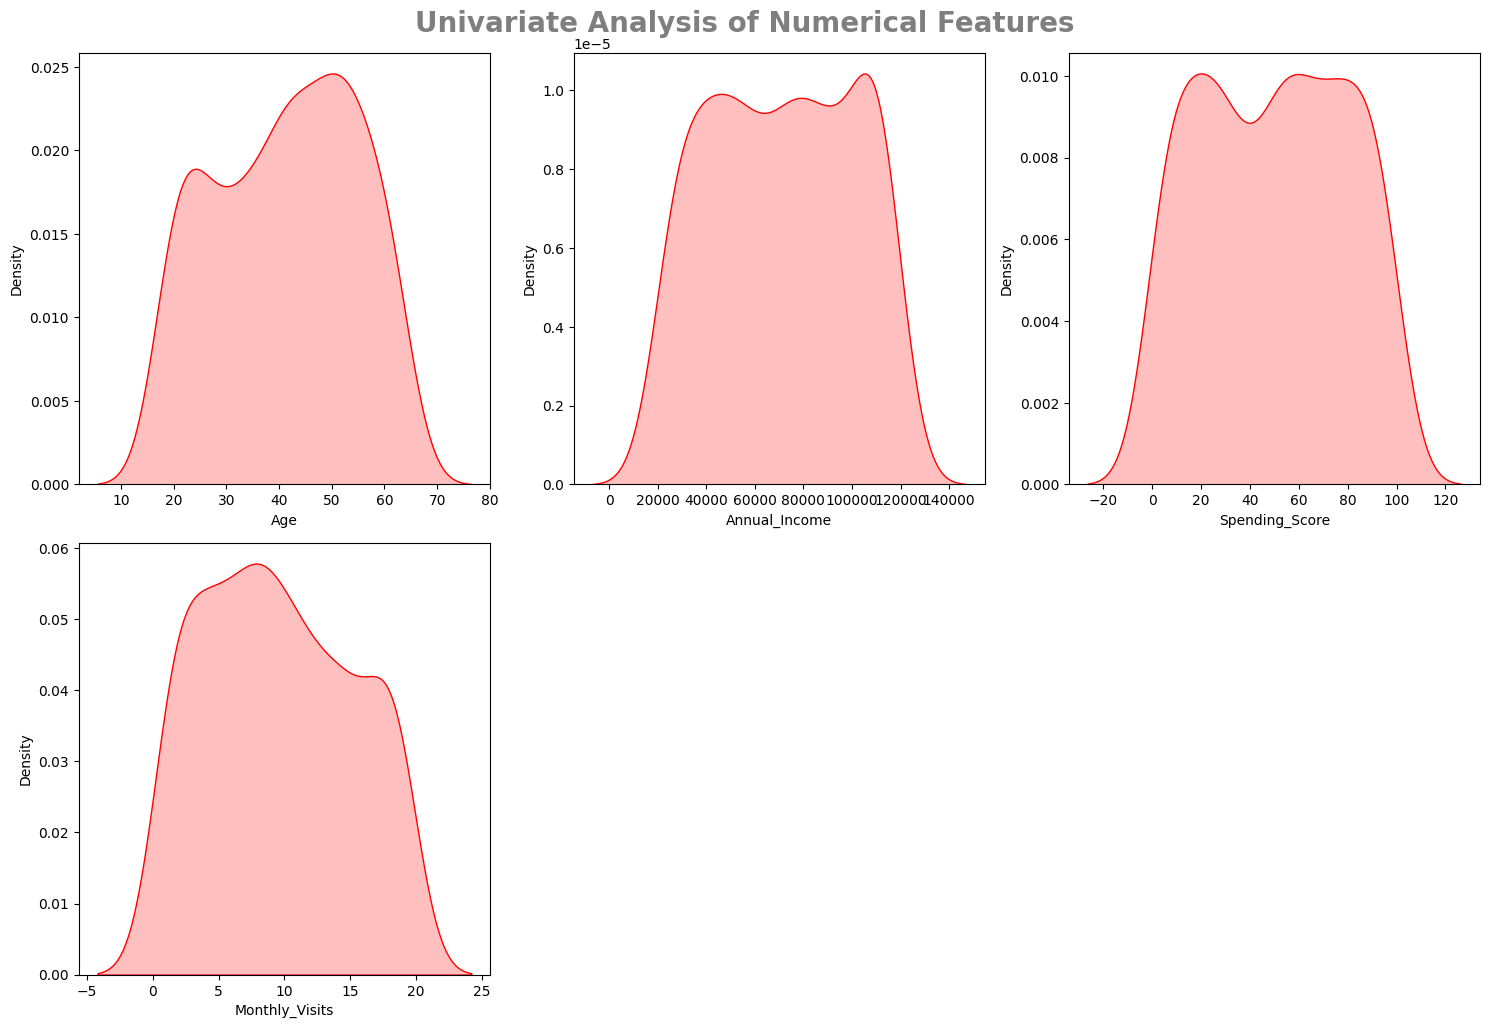

In [32]:
## Visualization Diagrams

plt.figure(figsize = (15,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize = 20, fontweight = 'bold', alpha = 0.5)
for i in range(0,len(numeric_features)):
  plt.subplot(3,3,i+1)
  sns.kdeplot(x = df_copy[numeric_features[i]], shade = True, color = 'r')
  plt.xlabel(numeric_features[i])
  plt.tight_layout()

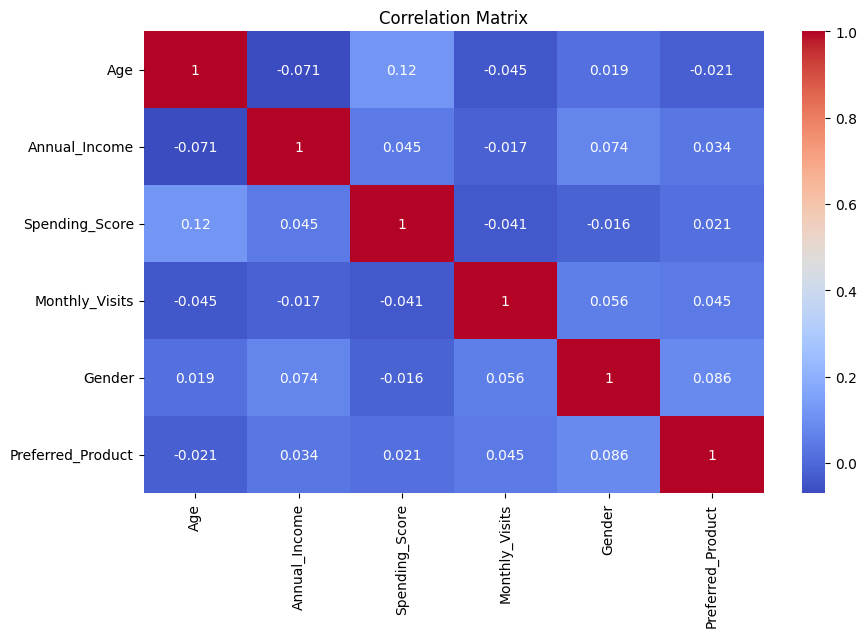

In [33]:
# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [34]:
df_copy['Spending_Score'].value_counts()

Spending_Score
75    8
26    8
5     7
56    7
17    7
     ..
80    1
7     1
2     1
48    1
9     1
Name: count, Length: 98, dtype: int64

<Axes: ylabel='count'>

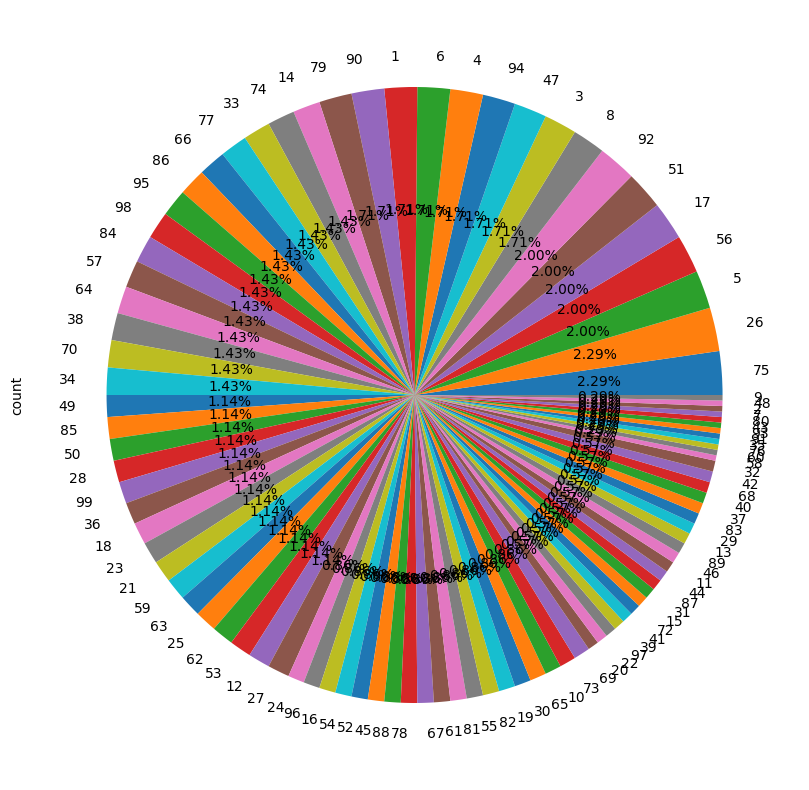

In [35]:


df_copy['Spending_Score'].value_counts().plot.pie(y = df_copy['Spending_Score'], figsize = (10,10), autopct = '%.2f%%')

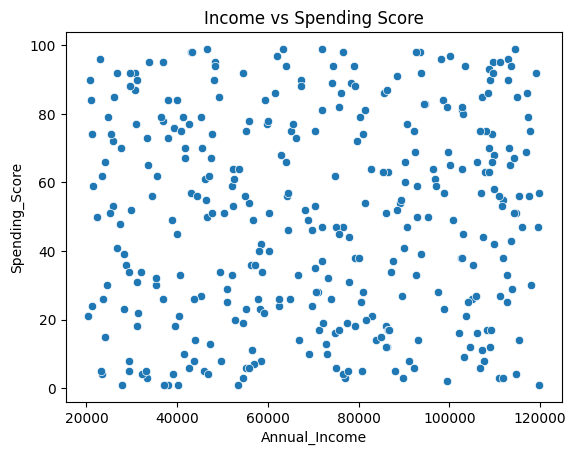

In [36]:
sns.scatterplot(x='Annual_Income', y='Spending_Score', data=df_copy)
plt.title("Income vs Spending Score")
plt.show()

In [37]:
# Top 10 App Categories
Age = pd.DataFrame(df_copy['Age'].value_counts())
Age

,count
Age,
50,15
52,14
41,13
61,12
45,11
19,11
56,11
49,11
25,10


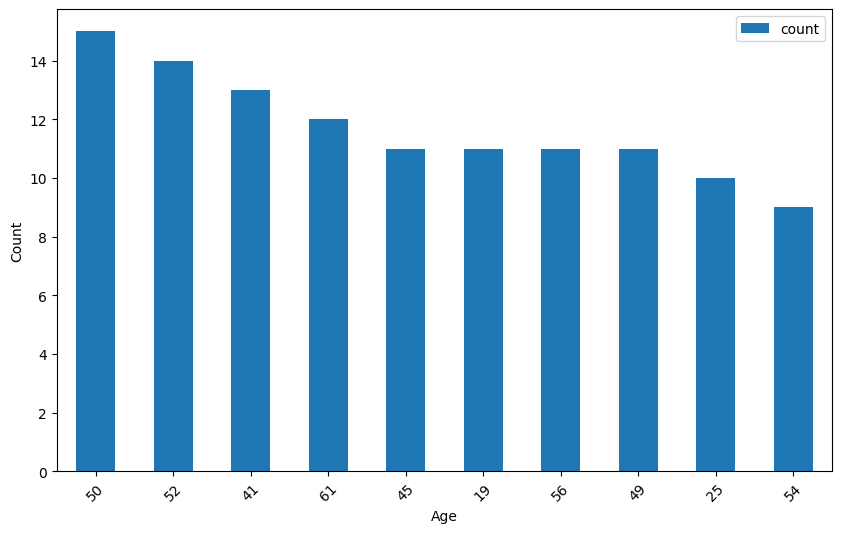

In [38]:
top_10_ages = Age.head(10)
top_10_ages.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()